## 📒 Notebook Exploratorio - Evaluación de Calidad de Datos PLANEA

In [15]:
# 📒 Notebook Exploratorio - Evaluación de Calidad de Datos PLANEA

# Paso 1: Cargar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode

# Paso 2: Cargar archivo consolidado
df = pd.read_csv("../output/planea/planea_total.csv", encoding="utf-8-sig", low_memory=False)
print(f"✅ Archivo cargado con {df.shape[0]:,} filas y {df.shape[1]} columnas")

# Paso 3: Vista general de las variables
df.info()

# Paso 4: Vista previa del contenido
df.head(3)

✅ Archivo cargado con 321,513 filas y 76 columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321513 entries, 0 to 321512
Data columns (total 76 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ANIO_EVALUACION                       321513 non-null  int64  
 1   ENT                                   321513 non-null  object 
 2   ENTIDAD                               321513 non-null  object 
 3   CLAVE_ESCUELA                         321513 non-null  object 
 4   NOMBRE_ESCUELA                        321444 non-null  object 
 5   TURNO                                 321513 non-null  object 
 6   MUNICIPIO                             321513 non-null  object 
 7   LOCALIDAD                             321513 non-null  object 
 8   TIPO_ESCUELA                          321513 non-null  object 
 9   GRADO_EVALUADO                        321513 non-null  object 
 10  GRADO_MARGINACION 

,ANIO_EVALUACION,ENT,ENTIDAD,CLAVE_ESCUELA,NOMBRE_ESCUELA,TURNO,MUNICIPIO,LOCALIDAD,TIPO_ESCUELA,GRADO_EVALUADO,...,PERCEPCION_BIENESTAR_NACIONAL_PCT_2,PERCEPCION_BIENESTAR_NACIONAL_PCT_3,PERCEPCION_BIENESTAR_NACIONAL_PCT_4,MARGINACION_PARECIDAS_ALTO,MARGINACION_PARECIDAS_MEDIO,MARGINACION_PARECIDAS_BAJO,MARGINACION_NACIONAL_ALTO,MARGINACION_NACIONAL_MEDIO,MARGINACION_NACIONAL_BAJO,ARCHIVO_ORIGEN
0,2015,1,AGUASCALIENTES,01DPR0001V,RODRIGO RINCON GALLARDO,MATUTINO,RINCÓN DE ROMOS,RINCON DE ROMOS,General Pública,sexto año de primaria,...,33.3,39.3,11.6,0.0,100.0,0.0,39.2,30.3,29.0,2015_PEB_Escuelas_01.xlsx
1,2015,1,AGUASCALIENTES,01DPR0002U,ANTONIO VENTURA MEDINA,COMPLETO,SAN JOSÉ DE GRACIA,SAN JOSE DE GRACIA,General Pública,sexto año de primaria,...,33.3,39.3,11.6,38.4,32.6,27.7,39.2,30.3,29.0,2015_PEB_Escuelas_01.xlsx
2,2015,1,AGUASCALIENTES,01DPR0003T,BENIGNO CHAVEZ,VESPERTINO,JESÚS MARÍA,JESUS MARIA,General Pública,sexto año de primaria,...,33.3,39.3,11.6,100.0,0.0,0.0,39.2,30.3,29.0,2015_PEB_Escuelas_01.xlsx


## Funciones que se emplearán iterativamente

In [16]:
def analizar_variable_numerica(df, columna, mostrar_graficos=True, percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]):
    """
    Realiza un análisis exploratorio de una variable numérica:
    - Tipo, nulos, únicos
    - Estadísticas descriptivas
    - Detección de outliers con método de Tukey
    - Histogramas y boxplots (opcional)
    
    Parámetros:
        df (pd.DataFrame): DataFrame de entrada
        columna (str): Nombre de la columna a analizar
        mostrar_graficos (bool): Mostrar gráficos si es True (por defecto)
        percentiles (list): Lista de percentiles para mostrar
    """
    print(f"\n📊 Diagnóstico de la variable: {columna}")
    print(f"Tipo: {df[columna].dtype} | Nulos: {df[columna].isna().sum()} | Únicos: {df[columna].nunique()}")

    print("\n📈 Estadísticas descriptivas:")
    print(df[columna].describe(percentiles=percentiles))

    # Cálculo de outliers con método de Tukey
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1

    # Limite inferior no puede ser menor que 0
    limite_inferior = max(0, q1 - 1.5 * iqr)
    limite_superior = q3 + 1.5 * iqr

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    print(f"\n🚨 Posibles outliers fuera de rango [{limite_inferior:.1f}, {limite_superior:.1f}]: {len(outliers)} registros")

    if mostrar_graficos:
        plt.figure(figsize=(12, 4))

        # Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(df[columna], bins=50, kde=True)
        plt.title(f"Distribución de {columna}")

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[columna])
        plt.title(f"Boxplot de {columna}")

        plt.tight_layout()
        plt.show()


### Revisión variable por variable

In [17]:
# Listado completo de columnas
for col in df.columns:
    print(f"\n🔍 Variable: {col}")
    print(df[col].value_counts(dropna=False).head(10))  # Las 10 categorías más frecuentes
    print(f"Tipo: {df[col].dtype} | Nulos: {df[col].isna().sum()} | Únicos: {df[col].nunique()}")



🔍 Variable: ANIO_EVALUACION
ANIO_EVALUACION
2015    105404
2016    105148
2018     76990
2017     33971
Name: count, dtype: int64
Tipo: int64 | Nulos: 0 | Únicos: 4

🔍 Variable: ENT
ENT
30    36701
15    33932
14    22038
21    19955
11    18031
12    14730
24    13733
9     13371
13    12499
19    10940
Name: count, dtype: int64
Tipo: object | Nulos: 0 | Únicos: 33

🔍 Variable: ENTIDAD
ENTIDAD
VERACRUZ            36701
JALISCO             22038
PUEBLA              19955
GUANAJUATO          18031
GUERRERO            14730
HIDALGO             12499
SAN LUIS POTOSI     12072
ESTADO DE MÉXICO    11372
ESTADO DE MEXICO    11147
NUEVO LEON           9867
Name: count, dtype: int64
Tipo: object | Nulos: 0 | Únicos: 41

🔍 Variable: CLAVE_ESCUELA
CLAVE_ESCUELA
09DST0067H    6
26EST0017P    6
14PES0129B    6
26ETV0218Z    6
30DST0116C    6
14DST0001K    6
30DES0012P    6
14DST0002J    6
14DST0003I    6
30DES0015M    6
Name: count, dtype: int64
Tipo: object | Nulos: 0 | Únicos: 119058

🔍 Variabl

### Limpieza: Variable `ENT`

In [18]:
# Copia original para trazabilidad
df["ENT_ORIGINAL"] = df["ENT"]

# Diagnóstico inicial
print("🔍 Valores únicos antes de limpiar:")
print(sorted(df["ENT"].unique()))

# Verifica si existen valores no convertibles a enteros
ent_invalidos = df[~df["ENT"].astype(str).str.match(r"^\s*\d+\s*$")]

if not ent_invalidos.empty:
    print("\n🚨 Registros con valores no enteros en 'ENT' antes de limpiar:")
    display(ent_invalidos[["ENT", "ANIO_EVALUACION", "ARCHIVO_ORIGEN"]].head(10))
    print(f"Total registros no enteros detectados: {len(ent_invalidos)}")

# Paso 1: Limpieza de caracteres no numéricos
df["ENT"] = (
    df["ENT"]
    .astype(str)
    .str.strip()
    .str.replace(r"[^0-9]", "", regex=True)
)

# Paso 2: Conversión segura a enteros
df["ENT"] = pd.to_numeric(df["ENT"], errors="coerce").astype("Int64")

# Paso 3: Diagnóstico final
print("\n✅ Valores únicos después de limpiar:")
print(sorted(df["ENT"].dropna().unique()))
print(f"Tipo: {df['ENT'].dtype} | Nulos: {df['ENT'].isna().sum()} | Únicos: {df['ENT'].nunique()}")

# Paso 4 (opcional): Mostrar registros con valores faltantes
if df["ENT"].isna().sum() > 0:
    print("\n⚠️ Registros con 'ENT' nulo tras limpieza:")
    display(df[df["ENT"].isna()][["ENT_ORIGINAL", "ANIO_EVALUACION", "ARCHIVO_ORIGEN"]].head(10))


🔍 Valores únicos antes de limpiar:
['1', '10', '11', '12', '13', '14', '15', '16', '16_', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '4', '5', '6', '7', '8', '9']

🚨 Registros con valores no enteros en 'ENT' antes de limpiar:


,ENT,ANIO_EVALUACION,ARCHIVO_ORIGEN
283595,16_,2018,2018_PEB_Escuelas_16.xlsx


Total registros no enteros detectados: 1

✅ Valores únicos después de limpiar:
[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32)]
Tipo: Int64 | Nulos: 0 | Únicos: 32


### Limpieza: Variable `ENTIDAD`

In [19]:
# Diagnóstico inicial
print("\n✅ Diagnóstico inicial de 'ENTIDAD'")
print(f"Tipo: {df['ENTIDAD'].dtype} | Nulos: {df['ENTIDAD'].isna().sum()} | Únicos: {df['ENTIDAD'].nunique()}")

# Diccionario de claves ENT a nombre de entidad
ENTIDADES = {
    1: "AGUASCALIENTES", 2: "BAJA CALIFORNIA", 3: "BAJA CALIFORNIA SUR", 4: "CAMPECHE",
    5: "COAHUILA", 6: "COLIMA", 7: "CHIAPAS", 8: "CHIHUAHUA", 9: "CIUDAD DE MEXICO",
    10: "DURANGO", 11: "GUANAJUATO", 12: "GUERRERO", 13: "HIDALGO", 14: "JALISCO",
    15: "ESTADO DE MEXICO", 16: "MICHOACAN", 17: "MORELOS", 18: "NAYARIT", 19: "NUEVO LEON",
    20: "OAXACA", 21: "PUEBLA", 22: "QUERETARO", 23: "QUINTANA ROO", 24: "SAN LUIS POTOSI",
    25: "SINALOA", 26: "SONORA", 27: "TABASCO", 28: "TAMAULIPAS", 29: "TLAXCALA",
    30: "VERACRUZ", 31: "YUCATAN", 32: "ZACATECAS"
}

# 1. Convertimos a string y aplicamos limpieza general
df["ENTIDAD"] = df["ENTIDAD"].astype(str).str.strip()
df["ENTIDAD"] = df["ENTIDAD"].apply(lambda x: unidecode(x.upper()))

# 2. Reemplazo específico
df["ENTIDAD"] = df["ENTIDAD"].replace("MEXICO", "ESTADO DE MEXICO")

# 3. Lista válida (de referencia) de entidades esperadas
entidades_validas = set(ENTIDADES.values())

# 4. Identificamos valores no válidos antes de limpiar
valores_no_validos = set(df["ENTIDAD"].unique()) - entidades_validas
if valores_no_validos:
    print("⚠️ Valores no válidos encontrados en la columna 'ENTIDAD':")
    for val in sorted(valores_no_validos):
        print(f"  • {val}")
    print("\n🔍 Registros afectados:")
    print(df[df["ENTIDAD"].isin(valores_no_validos)][["ENTIDAD", "ARCHIVO_ORIGEN"]].head(10))  # muestra ejemplos

# 5. Opción: si quieres forzar que los no válidos se pongan como pd.NA
df.loc[~df["ENTIDAD"].isin(entidades_validas), "ENTIDAD"] = pd.NA

# 6. Finalmente, nos aseguramos de que el tipo sea string
df["ENTIDAD"] = df["ENTIDAD"].astype("string")

# Diagnóstico final
print("\n✅ Diagnóstico final de 'ENTIDAD'")
print(f"Tipo: {df['ENTIDAD'].dtype} | Nulos: {df['ENTIDAD'].isna().sum()} | Únicos: {df['ENTIDAD'].nunique()}")

print("\n✅ Valores únicos en 'ENTIDAD':")
valores_ordenados = df["ENTIDAD"].value_counts(dropna=False).sort_index()
print(valores_ordenados)





✅ Diagnóstico inicial de 'ENTIDAD'
Tipo: object | Nulos: 0 | Únicos: 41

✅ Diagnóstico final de 'ENTIDAD'
Tipo: string | Nulos: 0 | Únicos: 32

✅ Valores únicos en 'ENTIDAD':
ENTIDAD
AGUASCALIENTES          3104
BAJA CALIFORNIA         6646
BAJA CALIFORNIA SUR     1760
CAMPECHE                3185
CHIAPAS                 8185
CHIHUAHUA               8698
CIUDAD DE MEXICO       13371
COAHUILA                7047
COLIMA                  1896
DURANGO                 9243
ESTADO DE MEXICO       33932
GUANAJUATO             18031
GUERRERO               14730
HIDALGO                12499
JALISCO                22038
MICHOACAN               3585
MORELOS                 4817
NAYARIT                 4898
NUEVO LEON             10940
OAXACA                  2855
PUEBLA                 19955
QUERETARO               5763
QUINTANA ROO            3676
SAN LUIS POTOSI        13733
SINALOA                 9704
SONORA                  7442
TABASCO                 8192
TAMAULIPAS              9095
TLAX

### Limpieza: Variable `CLAVE_ESCUELA`

In [20]:
# Nos aseguramos de que el tipo sea string
df["CLAVE_ESCUELA"] = df["CLAVE_ESCUELA"].astype("string")

print("\n✅ Diagnóstico final de 'CLAVE_ESCUELA'")
print(f"Tipo: {df['CLAVE_ESCUELA'].dtype} | Nulos: {df['CLAVE_ESCUELA'].isna().sum()} | Únicos: {df['CLAVE_ESCUELA'].nunique()}")


✅ Diagnóstico final de 'CLAVE_ESCUELA'
Tipo: string | Nulos: 0 | Únicos: 119058


### Limpieza: Variable `NOMBRE_ESCUELA`

In [21]:
# Diagnóstico inicial
print("\n✅ Diagnóstico inicial de 'NOMBRE_ESCUELA'")
print(f"Tipo: {df['NOMBRE_ESCUELA'].dtype} | Nulos: {df['NOMBRE_ESCUELA'].isna().sum()} | Únicos: {df['NOMBRE_ESCUELA'].nunique()}")

# Limpieza
def limpiar_nombre_escuela(nombre):
    if pd.isna(nombre):
        return nombre
    nombre = str(nombre).strip().upper()            # Convierte a mayúsculas
    nombre = unidecode(nombre)                      # Quita acentos y diacríticos
    nombre = nombre.replace("  ", " ")              # Elimina espacios dobles
    nombre = ''.join(c for c in nombre if c.isalnum() or c.isspace() or c in ".-")  # Mantiene letras, números, espacio, punto y guión
    return nombre

df["NOMBRE_ESCUELA"] = df["NOMBRE_ESCUELA"].apply(limpiar_nombre_escuela)

# Nos aseguramos de que el tipo sea string
df["NOMBRE_ESCUELA"] = df["NOMBRE_ESCUELA"].astype("string")

# Diagnóstico final
print("\n✅ Diagnóstico final de 'NOMBRE_ESCUELA'")
print(f"Tipo: {df['NOMBRE_ESCUELA'].dtype} | Nulos: {df['NOMBRE_ESCUELA'].isna().sum()} | Únicos: {df['NOMBRE_ESCUELA'].nunique()}")
print("\nTop valores:")
print(df["NOMBRE_ESCUELA"].value_counts(dropna=False).head(10))


✅ Diagnóstico inicial de 'NOMBRE_ESCUELA'
Tipo: object | Nulos: 69 | Únicos: 45897

✅ Diagnóstico final de 'NOMBRE_ESCUELA'
Tipo: string | Nulos: 69 | Únicos: 44473

Top valores:
NOMBRE_ESCUELA
EMILIANO ZAPATA              7055
BENITO JUAREZ                6067
VICENTE GUERRERO             4327
MIGUEL HIDALGO Y COSTILLA    3870
MIGUEL HIDALGO               3835
CUAUHTEMOC                   3359
NINOS HEROES                 3227
FRANCISCO I. MADERO          3174
IGNACIO ZARAGOZA             2926
JOSEFA ORTIZ DE DOMINGUEZ    2886
Name: count, dtype: Int64


### Limpieza variable `TURNO`

In [22]:
# Diagnóstico inicial
print("\n✅ Diagnóstico inicial de 'TURNO'")
print(f"Tipo: {df['TURNO'].dtype} | Nulos: {df['TURNO'].isna().sum()} | Únicos: {df['TURNO'].nunique()}")

# Homologación y limpieza
def limpiar_turno(valor):
    if pd.isna(valor):
        return pd.NA
    valor = str(valor).strip().upper()
    valor = unidecode(valor)

    if valor in ["TIEMPO COMPLETO", "COMPLETO"]:
        return "TIEMPO COMPLETO"
    elif valor in ["AMPLIADO", "JORNADA AMPLIADA", "JORNADA AMPLIAD"]:
        return "JORNADA AMPLIADA"
    else:
        return valor

df["TURNO"] = df["TURNO"].apply(limpiar_turno).astype("string")

# Diagnóstico final
print("\n✅ Diagnóstico final de 'TURNO'")
print(f"Tipo: {df['TURNO'].dtype} | Nulos: {df['TURNO'].isna().sum()} | Únicos: {df['TURNO'].nunique()}")
print(df["TURNO"].value_counts(dropna=False))



✅ Diagnóstico inicial de 'TURNO'
Tipo: object | Nulos: 0 | Únicos: 11

✅ Diagnóstico final de 'TURNO'
Tipo: string | Nulos: 0 | Únicos: 8
TURNO
MATUTINO            248460
VESPERTINO           39659
TIEMPO COMPLETO      23966
DISCONTINUO           3239
JORNADA AMPLIADA      2707
COMPLEMENTARIO        2090
NOCTURNO              1391
CONTINUO                 1
Name: count, dtype: Int64


### Limpieza variable `MUNICIPIO`

In [23]:
# Diagnóstico inicial
print("\n✅ Diagnóstico inicial de 'MUNICIPIO'")
print(f"Tipo: {df['MUNICIPIO'].dtype} | Nulos: {df['MUNICIPIO'].isna().sum()} | Únicos: {df['MUNICIPIO'].nunique()}")

# Reutilizamos la función "limpiar_nombre_escuela"
df["MUNICIPIO"] = df["MUNICIPIO"].apply(limpiar_nombre_escuela)

# Nos aseguramos de que el tipo sea string
df["MUNICIPIO"] = df["MUNICIPIO"].astype("string")

# Diagnóstico final
print("\n✅ Diagnóstico final de 'MUNICIPIO'")
print(f"Tipo: {df['MUNICIPIO'].dtype} | Nulos: {df['MUNICIPIO'].isna().sum()} | Únicos: {df['MUNICIPIO'].nunique()}")
print("\nTop valores:")
print(df["MUNICIPIO"].value_counts(dropna=False).head(10))


✅ Diagnóstico inicial de 'MUNICIPIO'
Tipo: object | Nulos: 0 | Únicos: 2644

✅ Diagnóstico final de 'MUNICIPIO'
Tipo: string | Nulos: 0 | Únicos: 2092

Top valores:
MUNICIPIO
PUEBLA                 2866
TIJUANA                2761
JUAREZ                 2707
LEON                   2702
GUADALAJARA            2617
ECATEPEC DE MORELOS    2516
IZTAPALAPA             2443
ZAPOPAN                2189
CULIACAN               2189
BENITO JUAREZ          2177
Name: count, dtype: Int64


### Limpieza variable `LOCALIDAD`

In [24]:
# Diagnóstico inicial
print("\n✅ Diagnóstico inicial de 'LOCALIDAD'")
print(f"Tipo: {df['LOCALIDAD'].dtype} | Nulos: {df['LOCALIDAD'].isna().sum()} | Únicos: {df['LOCALIDAD'].nunique()}")

# Reutilizamos la función "limpiar_nombre_escuela"
df["LOCALIDAD"] = df["LOCALIDAD"].apply(limpiar_nombre_escuela)

# Nos aseguramos de que el tipo sea string
df["LOCALIDAD"] = df["LOCALIDAD"].astype("string")

# Diagnóstico final
print("\n✅ Diagnóstico final de 'LOCALIDAD'")
print(f"Tipo: {df['LOCALIDAD'].dtype} | Nulos: {df['LOCALIDAD'].isna().sum()} | Únicos: {df['LOCALIDAD'].nunique()}")
print("\nTop valores:")
print(df["LOCALIDAD"].value_counts(dropna=False).head(10))


✅ Diagnóstico inicial de 'LOCALIDAD'
Tipo: object | Nulos: 0 | Únicos: 35834

✅ Diagnóstico final de 'LOCALIDAD'
Tipo: string | Nulos: 0 | Únicos: 35486

Top valores:
LOCALIDAD
GUADALAJARA                   2618
HEROICA PUEBLA DE ZARAGOZA    2562
ECATEPEC DE MORELOS           2497
TIJUANA                       2427
LEON DE LOS ALDAMA            2176
JUAREZ                        2138
MONTERREY                     2075
ZAPOPAN                       1920
SAN LUIS POTOSI               1581
CIUDAD NEZAHUALCOYOTL         1543
Name: count, dtype: Int64


### Limpieza variable `TIPO ESCUELA`

In [25]:
# Diagnóstico inicial
print("\n✅ Diagnóstico inicial de 'TIPO_ESCUELA'")
print(f"Tipo: {df['TIPO_ESCUELA'].dtype} | Nulos: {df['TIPO_ESCUELA'].isna().sum()} | Únicos: {df['TIPO_ESCUELA'].nunique()}")

# Reutilizamos la función "limpiar_nombre_escuela"
df["TIPO_ESCUELA"] = df["TIPO_ESCUELA"].apply(limpiar_nombre_escuela)

# Nos aseguramos de que el tipo sea string
df["TIPO_ESCUELA"] = df["TIPO_ESCUELA"].astype("string")

# Diagnóstico final
print("\n✅ Diagnóstico final de 'TIPO_ESCUELA'")
print(f"Tipo: {df['TIPO_ESCUELA'].dtype} | Nulos: {df['TIPO_ESCUELA'].isna().sum()} | Únicos: {df['TIPO_ESCUELA'].nunique()}")
print("\nTop valores:")
print(df["TIPO_ESCUELA"].value_counts(dropna=False).head(10))


✅ Diagnóstico inicial de 'TIPO_ESCUELA'
Tipo: object | Nulos: 0 | Únicos: 12

✅ Diagnóstico final de 'TIPO_ESCUELA'
Tipo: string | Nulos: 0 | Únicos: 6

Top valores:
TIPO_ESCUELA
GENERAL PUBLICA    190354
TELESECUNDARIA      44683
PRIVADA             37858
COMUNITARIA         22780
INDIGENA            14843
TECNICA PUBLICA     10995
Name: count, dtype: Int64


### Limpieza variable `GRADO_EVALUADO`

In [26]:
# Diagnóstico inicial
print("\n✅ Diagnóstico inicial de 'GRADO_EVALUADO'")
print(f"Tipo: {df['GRADO_EVALUADO'].dtype} | Nulos: {df['GRADO_EVALUADO'].isna().sum()} | Únicos: {df['GRADO_EVALUADO'].nunique()}")

# Homologación y limpieza
def limpiar_grado(valor):
    if pd.isna(valor):
        return pd.NA
    valor = str(valor).strip().upper()
    valor = unidecode(valor)

    if valor in ["SEXTO ANO DE PRIMARIA", "SEXTO GRADO DE PRIMARIA"]:
        return "SEXTO GRADO DE PRIMARIA"
    elif valor in ["TERCER ANO DE SECUNDARIA", "TERCER GRADO DE SECUNDARIA"]:
        return "TERCER GRADO DE SECUNDARIA"
    else:
        return valor

df["GRADO_EVALUADO"] = df["GRADO_EVALUADO"].apply(limpiar_grado).astype("string")

# Diagnóstico final
print("\n✅ Diagnóstico final de 'GRADO_EVALUADO'")
print(f"Tipo: {df['GRADO_EVALUADO'].dtype} | Nulos: {df['GRADO_EVALUADO'].isna().sum()} | Únicos: {df['GRADO_EVALUADO'].nunique()}")
print(df["GRADO_EVALUADO"].value_counts(dropna=False))


✅ Diagnóstico inicial de 'GRADO_EVALUADO'
Tipo: object | Nulos: 0 | Únicos: 6

✅ Diagnóstico final de 'GRADO_EVALUADO'
Tipo: string | Nulos: 0 | Únicos: 2
GRADO_EVALUADO
SEXTO GRADO DE PRIMARIA       224526
TERCER GRADO DE SECUNDARIA     96987
Name: count, dtype: Int64


### Limpieza variable `GRADO_MARGINACION`

In [27]:
# Diagnóstico inicial
print("\n✅ Diagnóstico inicial de 'GRADO_MARGINACION'")
print(f"Tipo: {df['GRADO_MARGINACION'].dtype} | Nulos: {df['GRADO_MARGINACION'].isna().sum()} | Únicos: {df['GRADO_MARGINACION'].nunique()}")

# Homologación y limpieza
def limpiar_marginacion(valor):
    if pd.isna(valor):
        return pd.NA
    valor = str(valor).strip().upper()
    valor = unidecode(valor)

    if valor in ["MUY ALTA Y ALTA", "MUY ALTA O ALTA", "ALTO", "MUY ALTO"]:
        return "MUY ALTA Y ALTA"
    elif valor in ["MEDIA", "MEDIO"]:
        return "MEDIA"
    elif valor in ["BAJA Y MUY BAJA", "BAJA O MUY BAJA", "BAJO", "MUY BAJO"]:
        return "BAJA Y MUY BAJA"
    elif valor == "NO IDENTIFICADA":
        return "NO IDENTIFICADA"
    else:
        return valor

df["GRADO_MARGINACION"] = df["GRADO_MARGINACION"].apply(limpiar_marginacion).astype("string")

# Diagnóstico final
print("\n✅ Diagnóstico final de 'GRADO_MARGINACION'")
print(f"Tipo: {df['GRADO_MARGINACION'].dtype} | Nulos: {df['GRADO_MARGINACION'].isna().sum()} | Únicos: {df['GRADO_MARGINACION'].nunique()}")
print(df["GRADO_MARGINACION"].value_counts(dropna=False).sort_index())



✅ Diagnóstico inicial de 'GRADO_MARGINACION'
Tipo: object | Nulos: 0 | Únicos: 13

✅ Diagnóstico final de 'GRADO_MARGINACION'
Tipo: string | Nulos: 0 | Únicos: 4
GRADO_MARGINACION
BAJA Y MUY BAJA    100988
MEDIA               62062
MUY ALTA Y ALTA    145012
NO IDENTIFICADA     13451
Name: count, dtype: Int64


### Limpieza variable `ALUMNOS_PROGRAMADOS`


📊 Diagnóstico de la variable: ALUMNOS_PROGRAMADOS
Tipo: int64 | Nulos: 0 | Únicos: 399

📈 Estadísticas descriptivas:
count    321513.000000
mean         29.619185
std          33.465347
min           1.000000
1%            1.000000
25%           7.000000
50%          20.000000
75%          35.000000
99%         174.000000
max         558.000000
Name: ALUMNOS_PROGRAMADOS, dtype: float64

🚨 Posibles outliers fuera de rango [0.0, 77.0]: 21527 registros


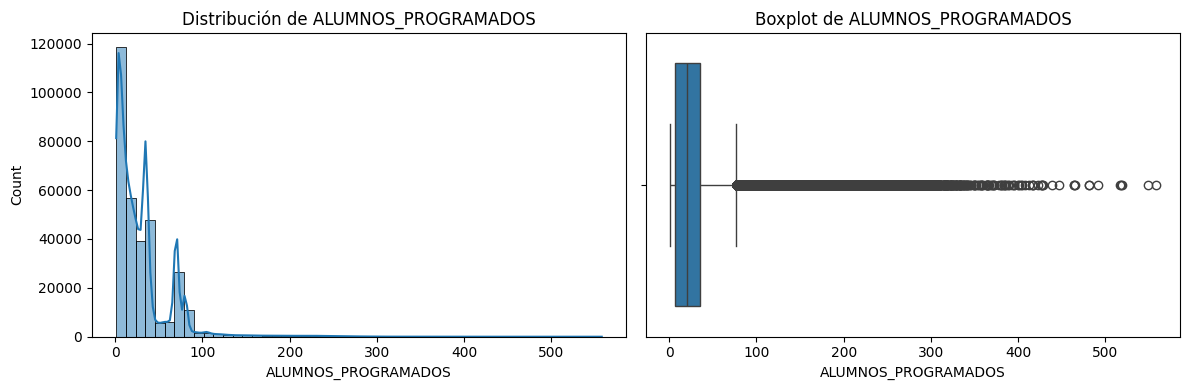

In [28]:
analizar_variable_numerica(df, "ALUMNOS_PROGRAMADOS")

### Limpieza variable `ALUMNOS_EVALUADOS_LENGUAJE` y `ALUMNOS_EVALUADOS_MATEMATICAS`


📊 Diagnóstico de la variable: ALUMNOS_EVALUADOS_LENGUAJE
Tipo: int64 | Nulos: 0 | Únicos: 369

📈 Estadísticas descriptivas:
count    321513.000000
mean         27.454588
std          30.808960
min           0.000000
1%            1.000000
25%           7.000000
50%          19.000000
75%          35.000000
99%         156.000000
max         549.000000
Name: ALUMNOS_EVALUADOS_LENGUAJE, dtype: float64

🚨 Posibles outliers fuera de rango [0.0, 77.0]: 12491 registros


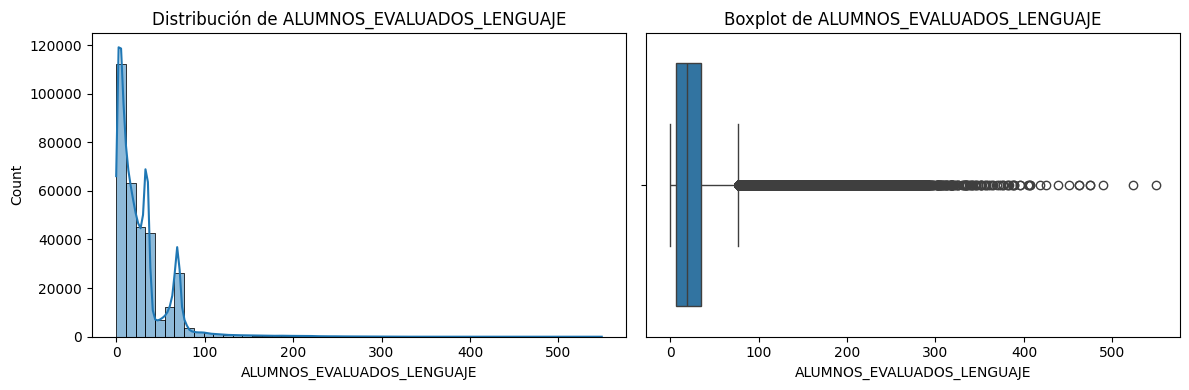

In [30]:
analizar_variable_numerica(df, "ALUMNOS_EVALUADOS_LENGUAJE")